# Loan Defaulter EDA
https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import scipy as sp

import os

%autosave 30

Autosaving every 30 seconds


## Datasets

In [319]:
colDesPath = r'C:/Users/asuto/Desktop/Work/Loan-Defaulter-Classification/datasets/columns_description.csv'
appliPath = r'C:/Users/asuto/Desktop/Work/Loan-Defaulter-Classification/datasets/application_data.csv'
prevAppliPath = r'C:/Users/asuto/Desktop/Work/Loan-Defaulter-Classification/datasets/previous_application.csv'

for i in [colDesPath,appliPath,prevAppliPath]:
    print(str(i),":",os.path.getsize(i)/1e6,'mb')

C:/Users/asuto/Desktop/Work/Loan-Defaulter-Classification/datasets/columns_description.csv : 0.028348 mb
C:/Users/asuto/Desktop/Work/Loan-Defaulter-Classification/datasets/application_data.csv : 166.13337 mb
C:/Users/asuto/Desktop/Work/Loan-Defaulter-Classification/datasets/previous_application.csv : 404.973293 mb


In [320]:
%%time
columnDescription = pd.read_csv(colDesPath).drop(columns = ['Unnamed: 0'])
columnDescription.head()

CPU times: total: 0 ns
Wall time: 4 ms


,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [321]:
columnDescription.Table.value_counts()

Table
application_data            122
previous_application.csv     38
Name: count, dtype: int64

In [322]:
%%time
appData = pd.read_csv(appliPath)
print(appData.shape)
appData.head()

(307511, 122)
CPU times: total: 3.52 s
Wall time: 3.59 s


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
# %%time
# prevAppData = pd.read_csv(prevAppliPath)
# print(prevAppData.shape)
# prevAppData.head()

## Understanding Columns

In [324]:
defiFnx = lambda col,table='application_data': columnDescription[(columnDescription.Row == col) & (columnDescription.Table==table)]['Description'].item()

In [325]:
columnDescription['Table'].value_counts(dropna=False)

Table
application_data            122
previous_application.csv     38
Name: count, dtype: int64

In [326]:
appDes = columnDescription[columnDescription.Table == 'application_data']
prevappDes = columnDescription[columnDescription.Table != 'application_data']

In [327]:
appDes[appDes.Special.notna()]

,Table,Row,Description,Special
16,application_data,REGION_POPULATION_RELATIVE,Normalized population of region where client l...,normalized
17,application_data,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
18,application_data,DAYS_EMPLOYED,How many days before the application the perso...,time only relative to the application
19,application_data,DAYS_REGISTRATION,How many days before the application did clien...,time only relative to the application
20,application_data,DAYS_ID_PUBLISH,How many days before the application did clien...,time only relative to the application
33,application_data,HOUR_APPR_PROCESS_START,Approximately at what hour did the client appl...,rounded
41,application_data,EXT_SOURCE_1,Normalized score from external data source,normalized
42,application_data,EXT_SOURCE_2,Normalized score from external data source,normalized
43,application_data,EXT_SOURCE_3,Normalized score from external data source,normalized
44,application_data,APARTMENTS_AVG,Normalized information about building where th...,normalized


Notes:
* Drop SK_ID_CURR (loan id)
* Drop NAME_TYPE_SUITE (Who was accompanying client when he was applying for the loan)
* Merge these into a single column FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL. Suspicious if not communicable
* Look into merging these two REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY * Decide if these are important 
WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_STAR
* Merge into a single metric: 

REG_REGION_NOT_LIVE_REG, ON REG_REGION_NOT_WORK_REG, ON LIVE_REGION_NOT_WORK_REG, ON REG_CITY_NOT_LIVE_CI Y, REG_CITY_NOT_WORK_CI TY,LIVE_CITY_NOT_WORK_C. Suspicious if information doesnot match
* Merge FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21 into a single column. Divide by 20 to calculate final document submission
* AMT_REQ_CREDIT_BUREAU_X features (6 in total) to be decided 

In [328]:
for _,row in appDes.iterrows():
    # print(row['Row'],':',row['Description'],'\n')
    pass

## Feature Engineering

### Missing Data Analysis

#### NaN in Rows

#### Hypothesis 0: There any relation between the % of missing data points in each row and the chance of defaulting
* Clearly, 50% of our loan defaulter have a missing datapoint range of 40% to 50%. This is a significant pattern, and can be introduced as new column

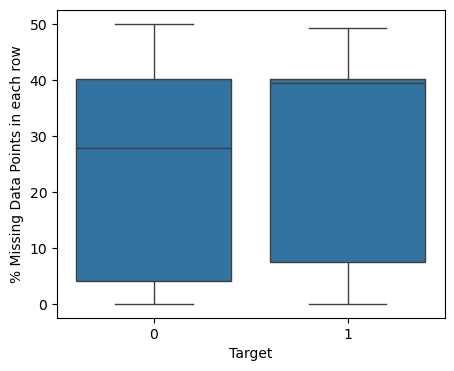

In [329]:
plt.figure(figsize=(5,4),dpi=100)
sns.boxplot(y = appData.isna().mean(axis=1)*100,x=appData.TARGET,showfliers=True)
plt.xlabel('Target')
plt.ylabel("% Missing Data Points in each row")
plt.show()

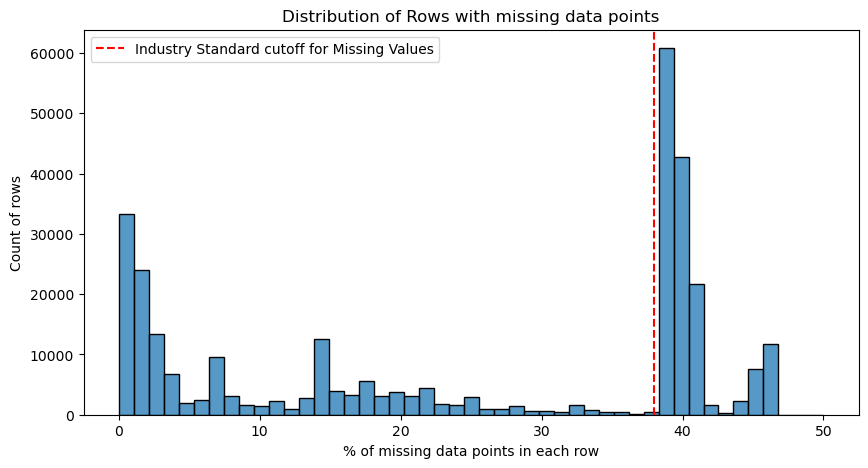

In [330]:
plt.figure(figsize=(10,5),dpi=100)
sns.histplot(appData.isna().mean(axis=1)*100)
plt.axvline(x=38,color='red',linestyle = '--',label='Industry Standard cutoff for Missing Values')
plt.title('Distribution of Rows with missing data points')
plt.xlabel('% of missing data points in each row')
plt.ylabel('Count of rows')
plt.legend()
plt.show()

In [331]:
# Feature Creation
appData = appData.assign(missingData = appData.isna().mean(axis=1)*100)

#### NaN in Columns

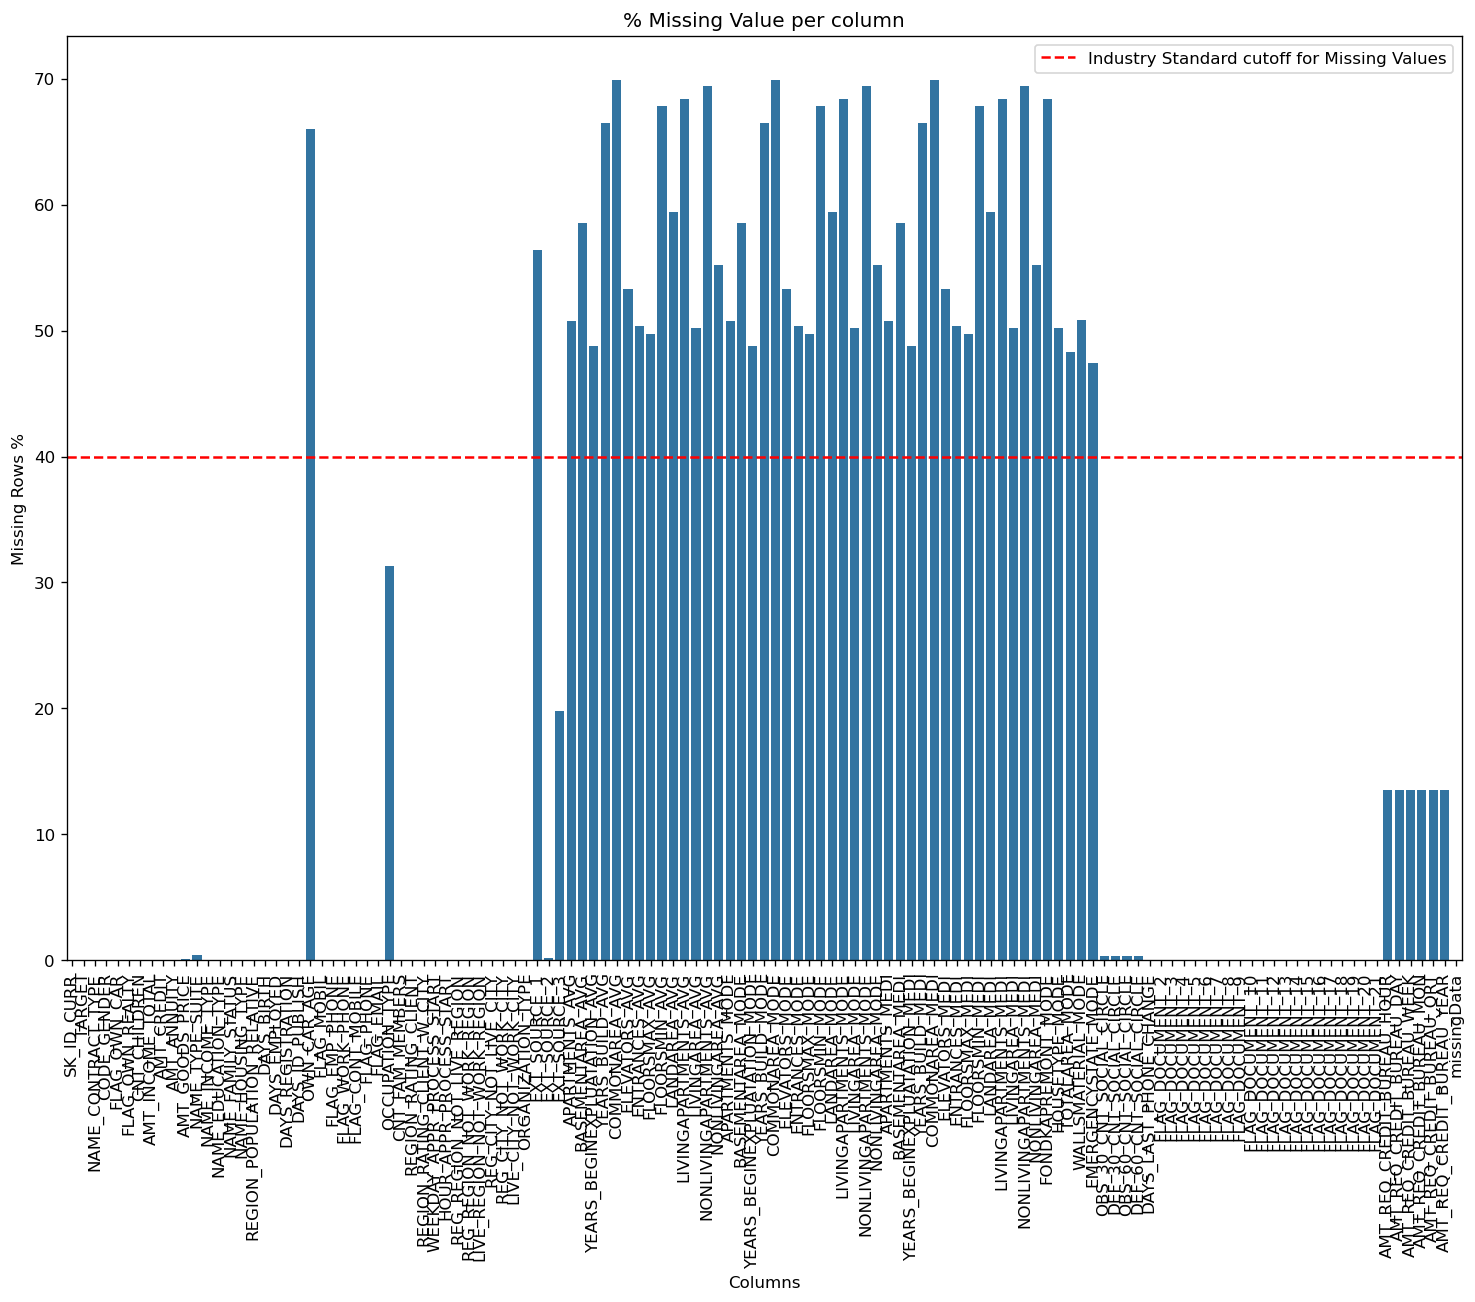

In [332]:
plt.figure(figsize=(15,10),dpi=120)
sns.barplot(data=appData.isna().mean()*100)
plt.axhline(y=40,color='red',linestyle = '--',label='Industry Standard cutoff for Missing Values')
plt.legend()
plt.xticks(rotation=90)
plt.title('% Missing Value per column')
plt.xlabel('Columns')
plt.ylabel('Missing Rows %')
plt.show()

In [333]:
missingDataCol = appData.isna().mean()
missingDataCol[missingDataCol>0.4]

OWN_CAR_AGE                     0.659908
EXT_SOURCE_1                    0.563811
APARTMENTS_AVG                  0.507497
BASEMENTAREA_AVG                0.585160
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BUILD_AVG                 0.664978
COMMONAREA_AVG                  0.698723
ELEVATORS_AVG                   0.532960
ENTRANCES_AVG                   0.503488
FLOORSMAX_AVG                   0.497608
FLOORSMIN_AVG                   0.678486
LANDAREA_AVG                    0.593767
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAREA_AVG                  0.501933
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAREA_AVG               0.551792
APARTMENTS_MODE                 0.507497
BASEMENTAREA_MODE               0.585160
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BUILD_MODE                0.664978
COMMONAREA_MODE                 0.698723
ELEVATORS_MODE                  0.532960
ENTRANCES_MODE                  0.503488
FLOORSMAX_MODE                  0.497608
FLOORSMIN_MODE  

### Basic EDA

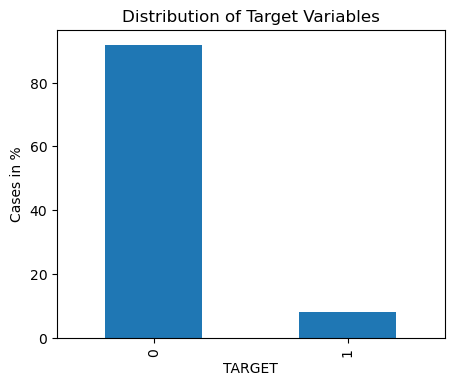

In [334]:
plt.figure(figsize=(5,4),dpi=100)
(appData['TARGET'].value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Distribution of Target Variables')
plt.ylabel('Cases in %')
plt.show()

In [335]:
# Correcting Age into INTEGER format
appData['age'] = (-appData['DAYS_BIRTH']/365).astype('int')
# appData.drop(columns=['DAYS_BIRTH'],inplace=True)

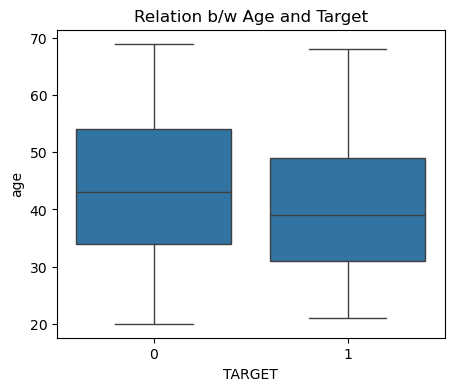

In [336]:
plt.figure(figsize=(5,4),dpi=100)
sns.boxplot(data=appData, y='age',x='TARGET')
plt.title("Relation b/w Age and Target")
plt.show()

In [337]:
# Correcting DAYS_EMPLOYED to work experience
appData['workExperience'] = (-appData['DAYS_EMPLOYED']/365).astype('float')
# appData.drop(columns=['DAYS_EMPLOYED'],inplace=True)

In [338]:
#Number of cases where workExperience is less that 0. Since that is not possible, we will replace those rows with 0.
print("Number of cases with workEx < 0:", appData[appData['workExperience'] < 0].shape[0])

idx = appData[appData['workExperience'] < 0].index
appData.iloc[idx,appData.columns.get_loc('workExperience')] = 0

print("Number of cases with workEx < 0 after trasformation:", appData[appData['workExperience'] < 0].shape[0])

Number of cases with workEx < 0: 55374
Number of cases with workEx < 0 after trasformation: 0


In [339]:
# appData['workExperience'].describe()

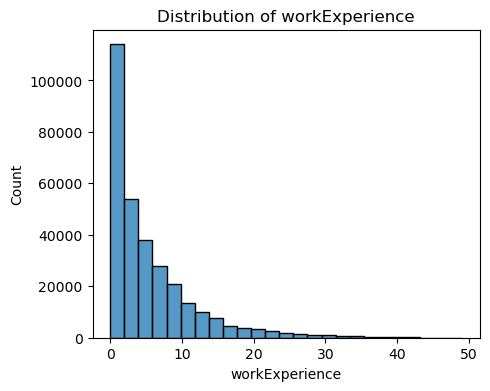

In [340]:
# appData['workExperience'].dtype
plt.figure(figsize=(5,4),dpi=100)
sns.histplot(data=appData,x='workExperience',binwidth = 2)
plt.title("Distribution of workExperience")
plt.show()

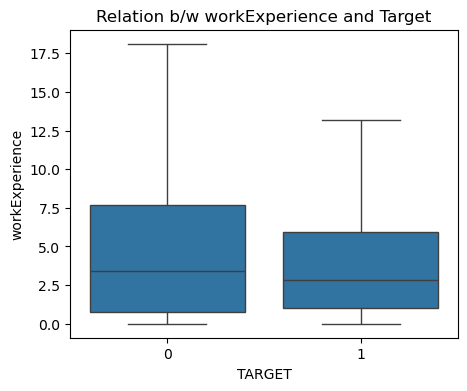

In [341]:
plt.figure(figsize=(5,4),dpi=100)
sns.boxplot(data=appData, y='workExperience',x='TARGET',showfliers=False)
plt.title("Relation b/w workExperience and Target")
plt.show()

In [342]:
# Dropping rows with wrong gender
appData = appData[appData['CODE_GENDER'] != 'XNA']

### Mobile Communication Columns
* Merging 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL'
* Summed them and divided by 6 (count of columns)
* Indicates how easy is it to communicate with the client
* Dropping the columns post new column creation

In [343]:
commCols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
for col in commCols:
    print(appData[col].value_counts(normalize=True))

FLAG_MOBIL
1    0.999997
0    0.000003
Name: proportion, dtype: float64
FLAG_EMP_PHONE
1    0.819887
0    0.180113
Name: proportion, dtype: float64
FLAG_WORK_PHONE
0    0.800642
1    0.199358
Name: proportion, dtype: float64
FLAG_CONT_MOBILE
1    0.998133
0    0.001867
Name: proportion, dtype: float64
FLAG_PHONE
0    0.718943
1    0.281057
Name: proportion, dtype: float64
FLAG_EMAIL
0    0.943279
1    0.056721
Name: proportion, dtype: float64


In [344]:
defiFnx('FLAG_EMAIL')

'Did client provide email (1=YES, 0=NO)'

#### Hypothesis 1: There is a relation between the communication mode and the chance of defaulting?
* Using Chi2 to understand the correlation between two categorical variables: Communication Method and Target
* Null Hypothesis: There is a relation between the communication method and the chance of defaulting
* Alternation Hypothesis: There is no relation between the communication method and the chance of defaulting
* If the value is less that 0.05(critical value), we will reject the null hypothesis.

In [345]:
commCols = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
for col in commCols:
    chi2, p, dof, ex = sp.stats.chi2_contingency(pd.crosstab(appData['FLAG_MOBIL'], appData['TARGET']))
    print(f"Columns name:{col}. p-Value:{p}")
    if p > 0.05:
        print(f"No relation between {col} and Target Variable\n")
    else:
        print(f"There is a relation between {col} and Target Variable")

Columns name:FLAG_MOBIL. p-Value:1.0
No relation between FLAG_MOBIL and Target Variable

Columns name:FLAG_EMP_PHONE. p-Value:1.0
No relation between FLAG_EMP_PHONE and Target Variable

Columns name:FLAG_WORK_PHONE. p-Value:1.0
No relation between FLAG_WORK_PHONE and Target Variable

Columns name:FLAG_CONT_MOBILE. p-Value:1.0
No relation between FLAG_CONT_MOBILE and Target Variable

Columns name:FLAG_PHONE. p-Value:1.0
No relation between FLAG_PHONE and Target Variable

Columns name:FLAG_EMAIL. p-Value:1.0
No relation between FLAG_EMAIL and Target Variable



In [346]:
%%time
print(appData.shape)
appData['mobileCommunication'] = appData[commCols].sum(axis=1)#/len(commCols)
# appData.drop(columns = commCols, inplace=True)
print(appData.shape)

(307507, 125)
(307507, 126)
CPU times: total: 46.9 ms
Wall time: 37 ms


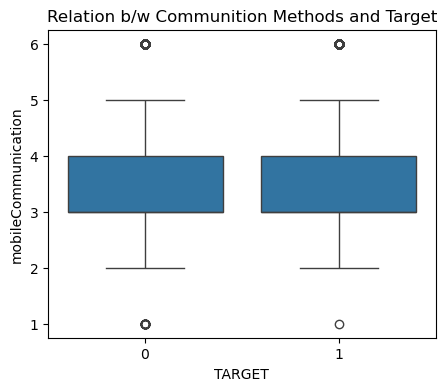

In [347]:
appData['mobileCommunication'] 

plt.figure(figsize=(5,4),dpi=100)
sns.boxplot(data=appData,x='TARGET', y='mobileCommunication')
plt.title("Relation b/w Communition Methods and Target")
plt.show()

### Region Columns
* Merging REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY into a single column
* Taking the average of these two columns
* Dropping the two after creation

In [348]:
defiFnx('REGION_RATING_CLIENT_W_CITY')

'Our rating of the region where client lives with taking city into account (1,2,3)'

In [349]:
regCols = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']
appData[regCols].head()

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
0,2,2
1,1,1
2,2,2
3,2,2
4,2,2


In [350]:
for col in regCols:
    print(col,':',defiFnx(col))

REGION_RATING_CLIENT : Our rating of the region where client lives (1,2,3)
REGION_RATING_CLIENT_W_CITY : Our rating of the region where client lives with taking city into account (1,2,3)


In [351]:
for col in regCols:
    print(appData[col].value_counts(normalize=True))

REGION_RATING_CLIENT
2    0.738133
3    0.157164
1    0.104703
Name: proportion, dtype: float64
REGION_RATING_CLIENT_W_CITY
2    0.746263
3    0.142628
1    0.111110
Name: proportion, dtype: float64


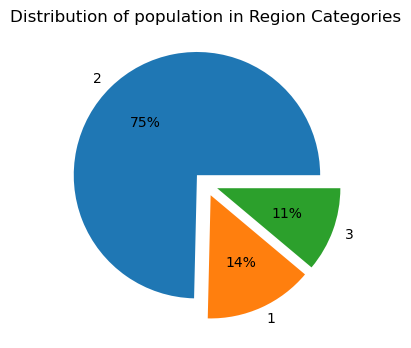

In [352]:
plt.figure(figsize=(5,4),dpi=100)
plt.pie(appData['REGION_RATING_CLIENT_W_CITY'].value_counts(),labels=appData['REGION_RATING_CLIENT_W_CITY'].unique(),explode=[0.1, 0.1, 0.1] ,autopct='%.0f%%')
plt.title("Distribution of population in Region Categories")
plt.show()

#### Hypothesis 2: There is a relation between the region of stay and the chance of defaulting?
* There does not seem to be a heavy correlation
* What can be said is that, people dwelling in category 3 areas(lower in rating) tend more likely to default
* On the other hand, people dwelling in category 1 areas(higher in rating) are less likely to default
* However, its not a very strong correlation, and a cannot and should not be established.

<Figure size 500x400 with 0 Axes>

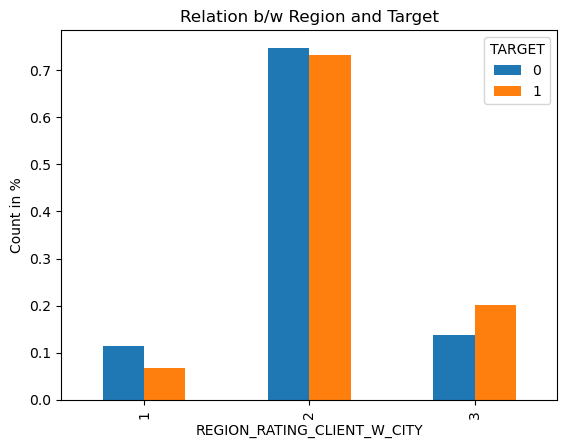

In [353]:
# Doesn't seem like a heavy relation. 
plt.figure(figsize=(5,4),dpi=100)
pd.crosstab(appData['REGION_RATING_CLIENT_W_CITY'], appData['TARGET'],normalize='columns').plot(kind='bar')
plt.title("Relation b/w Region and Target")
plt.ylabel("Count in %")
plt.show()

In [354]:
appData[appData[regCols[0]]!=appData[regCols[1]]][regCols]

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY
14,2,1
22,3,2
26,3,2
61,2,1
98,2,1
...,...,...
307173,3,2
307262,3,2
307283,3,2
307351,3,2


In [355]:
%%time
print(appData.shape)
appData['region'] = appData[regCols].mean(axis=1)
# appData.drop(columns = regCols, inplace=True)
print(appData.shape)

(307507, 126)
(307507, 127)
CPU times: total: 31.2 ms
Wall time: 31 ms


### Documents Submitted Columns
* Count of all the documents that the customer provided
* Seems like most of the people did not submit all documents, except for Document 3
* We can ommit the rest and keep document 3 column

In [356]:
docCols = [col for col in appData.columns  if 'DOCU' in col]
docCols[:3]

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']

In [357]:
defiFnx('FLAG_DOCUMENT_3')

'Did client provide document 3'

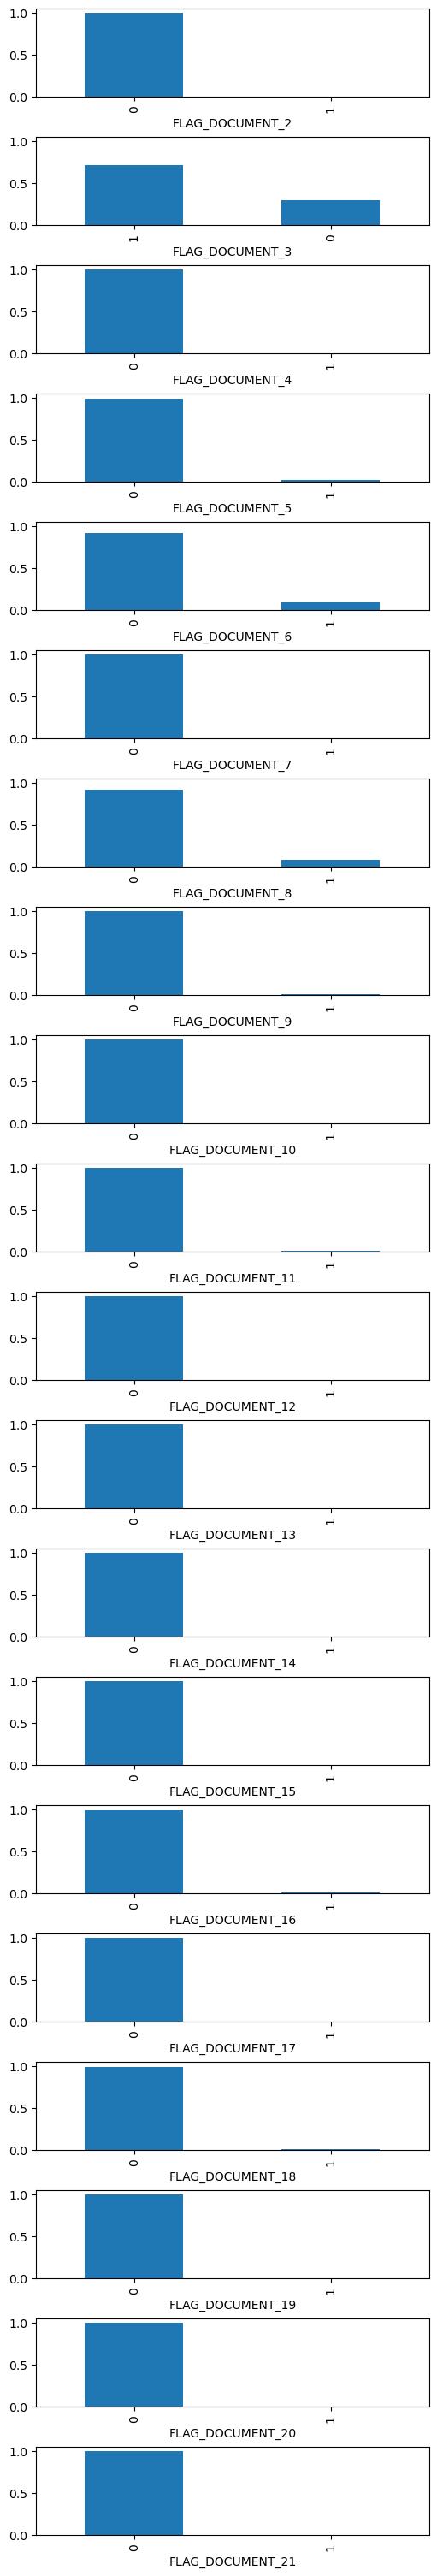

CPU times: total: 1.56 s
Wall time: 1.56 s


In [358]:
%%time
f, ax= plt.subplots(len(docCols), 1, sharey=True,figsize=(5,30),constrained_layout=True)
for i in range(len(docCols)):
    # pd.crosstab(appData[docCols[i]], appData['TARGET'],normalize='columns').plot(kind='bar',ax=ax[i])
    appData[docCols[i]].value_counts(normalize=True,dropna=False,sort=False).plot(kind='bar',ax=ax[i])
plt.show()

<Figure size 500x400 with 0 Axes>

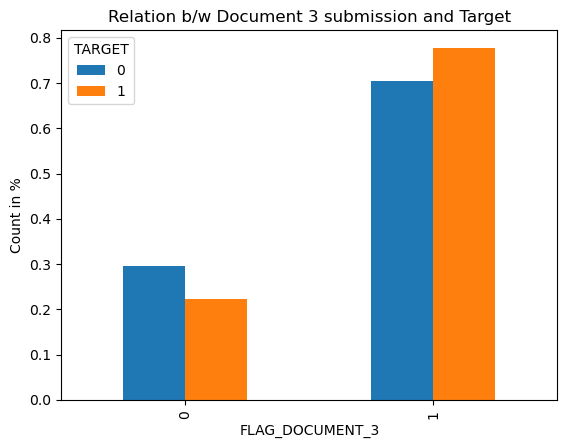

In [359]:
plt.figure(figsize=(5,4),dpi=100)
pd.crosstab(appData['FLAG_DOCUMENT_3'], appData['TARGET'],normalize='columns').plot(kind='bar')
plt.title("Relation b/w Document 3 submission and Target")
plt.ylabel("Count in %")
plt.show()

In [360]:
dropCols = []
for i in docCols:
    if i != 'FLAG_DOCUMENT_3':
        dropCols.append(i)
appData.drop(columns = dropCols, inplace=True)

### Credit Bureau Columns
* Represents the number of queries made to Credit Bureau in various time ranges
* Recommend to sum or average them into a single column for each row

In [361]:
amtCols = [col for col in appData.columns if 'AMT_REQ_CREDIT_BUREAU' in col]
len(amtCols)

6

In [362]:
amtCols
for col in amtCols:
    print(col,':',defiFnx(col))

AMT_REQ_CREDIT_BUREAU_HOUR : Number of enquiries to Credit Bureau about the client one hour before application
AMT_REQ_CREDIT_BUREAU_DAY : Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
AMT_REQ_CREDIT_BUREAU_WEEK : Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
AMT_REQ_CREDIT_BUREAU_MON : Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
AMT_REQ_CREDIT_BUREAU_QRT : Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
AMT_REQ_CREDIT_BUREAU_YEAR : Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)


In [363]:
# Most of the people have submitted all documents
for col in amtCols:
    print(appData[col].value_counts(normalize=True,dropna=False))

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    0.859694
NaN    0.135018
1.0    0.005073
2.0    0.000182
3.0    0.000029
4.0    0.000003
Name: proportion, dtype: float64
AMT_REQ_CREDIT_BUREAU_DAY
0.0    0.860140
NaN    0.135018
1.0    0.004202
2.0    0.000345
3.0    0.000146
4.0    0.000085
5.0    0.000029
6.0    0.000026
9.0    0.000007
8.0    0.000003
Name: proportion, dtype: float64
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    0.837223
NaN    0.135018
1.0    0.026692
2.0    0.000647
3.0    0.000189
4.0    0.000111
6.0    0.000065
5.0    0.000033
8.0    0.000016
7.0    0.000007
Name: proportion, dtype: float64
AMT_REQ_CREDIT_BUREAU_MON
0.0     0.722683
NaN     0.135018
1.0     0.107793
2.0     0.017515
3.0     0.006471
4.0     0.003499
5.0     0.001958
6.0     0.001115
7.0     0.000969
9.0     0.000670
8.0     0.000602
10.0    0.000429
11.0    0.000387
12.0    0.000250
13.0    0.000234
14.0    0.000130
15.0    0.000114
16.0    0.000075
17.0    0.000046
18.0    0.000020
19.0    0.000010
24.0    0.000003
23.0 

In [364]:
%%time
print(appData.shape)
appData['creditB'] = appData[amtCols].sum(axis=1)
# appData.drop(columns = amtCols, inplace=True)
print(appData.shape)

(307507, 108)
(307507, 109)
CPU times: total: 62.5 ms
Wall time: 90 ms


### Car Age
* Column has a lot of NaNs
* Cannot replace with 0 since it would mean that the car is brand new
* Shift to binary. has a car or not

In [365]:
defiFnx('OWN_CAR_AGE')

"Age of client's car"

In [366]:
appData['OWN_CAR_AGE']

0          NaN
1          NaN
2         26.0
3          NaN
4          NaN
          ... 
307506     NaN
307507     NaN
307508     NaN
307509     NaN
307510     NaN
Name: OWN_CAR_AGE, Length: 307507, dtype: float64

In [367]:
%%time
idx = appData[appData['OWN_CAR_AGE'].notna()].index
appData.loc[idx,'OWN_CAR_AGE'] = 1

appData.fillna(0,inplace=True)

# appData['OWN_CAR_AGE'].value_counts(normalize=True)

CPU times: total: 859 ms
Wall time: 833 ms


---

In [120]:
appData['CNT_FAM_MEMBERS'].value_counts(dropna=False)

CNT_FAM_MEMBERS
2.0     158355
1.0      67847
3.0      52600
4.0      24696
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: count, dtype: int64

Notes:
* Drop rows with unknown from NAME_FAMILY_STATUS
* Merge Categories in NAME_TYPE_SUITE
* Fix DAYS_REGISTRATION, DAYS_ID_PUBLISH column to years
* Merge NAME_INCOME_TYPE and OCCUPATION_TYPE into a single column
* Drop rows with NaN in CNT_FAM_MEMBERS
* Merge: REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY